<a href="https://colab.research.google.com/github/infung/weather_prediction/blob/main/weather_prediction_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [8]:
weather_data = pd.read_csv('sample_data/weather.csv')

weather_data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [9]:
weather_data.isnull().sum()

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64

<Axes: >

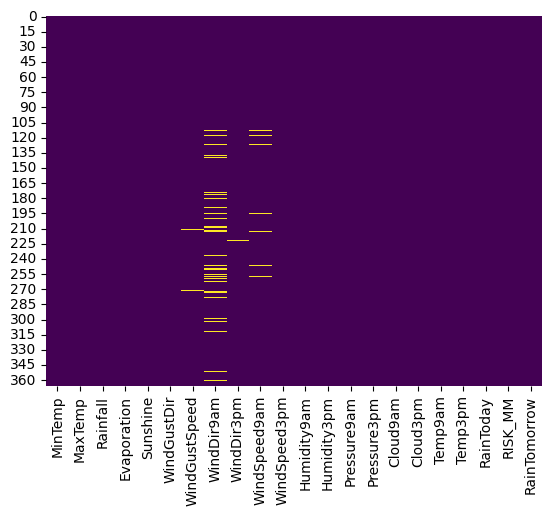

In [21]:
sns.heatmap(weather_data.isnull(), cbar=False, cmap='viridis')

In [22]:
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

imputer_int = KNNImputer(missing_values=np.nan)
weather_data['Sunshine'] = imputer_int.fit_transform(weather_data[['Sunshine']])

imputer_str = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
weather_data['WindGustDir'] = imputer_str.fit_transform(weather_data[['WindGustDir']])
weather_data['WindGustSpeed'] = imputer_int.fit_transform(weather_data[['WindGustSpeed']])
weather_data['WindDir9am'] = imputer_str.fit_transform(weather_data[['WindDir9am']])
weather_data['WindDir3pm'] = imputer_str.fit_transform(weather_data[['WindDir3pm']])
weather_data['WindSpeed9am'] = imputer_int.fit_transform(weather_data[['WindSpeed9am']])



<Axes: >

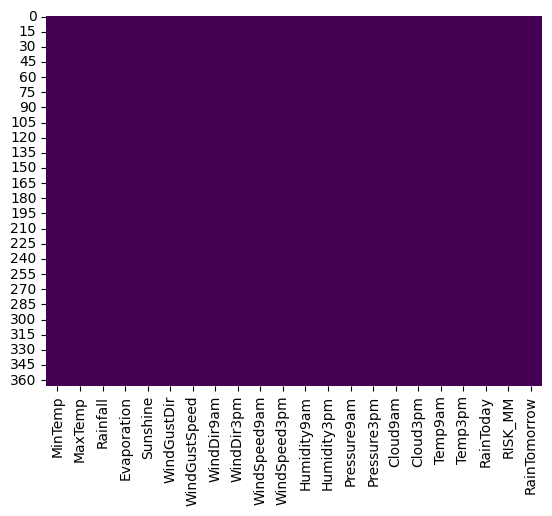

In [25]:
sns.heatmap(weather_data.isnull(), cbar=False, cmap='viridis')

In [26]:
weather_data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


<ipython-input-30-d6092894a110>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(weather_data.corr(),annot=True)


<Axes: >

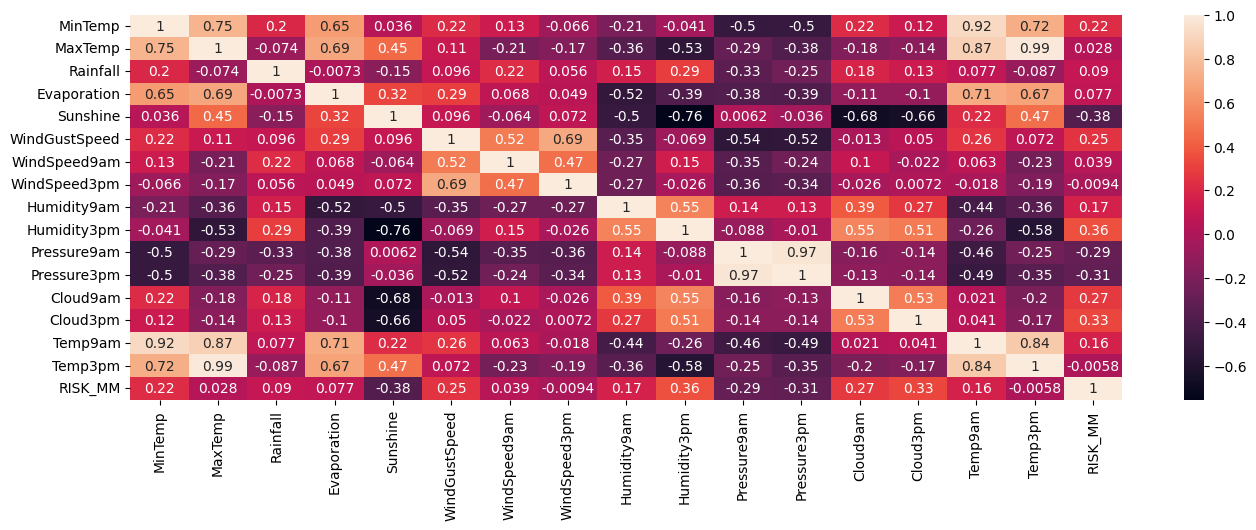

In [30]:
plt.figure(figsize = (16,5))
sns.heatmap(weather_data.corr(),annot=True)

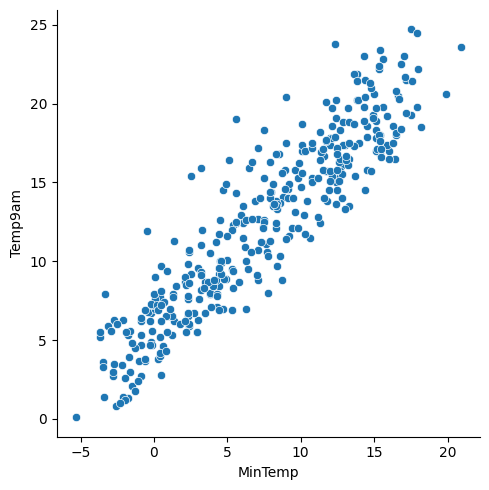

In [31]:
sns.relplot(x='MinTemp',y='Temp9am',data=weather_data)

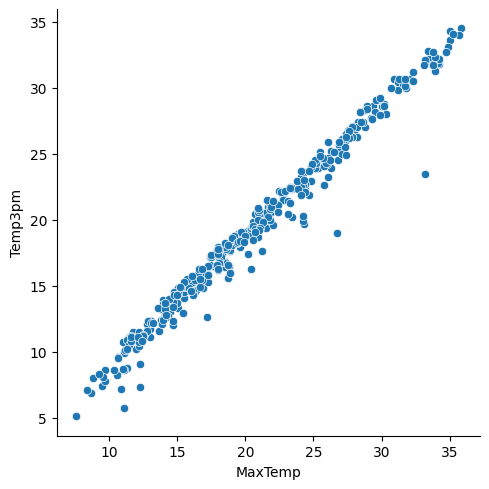

In [33]:
sns.relplot(x='MaxTemp',y='Temp3pm',data=weather_data)

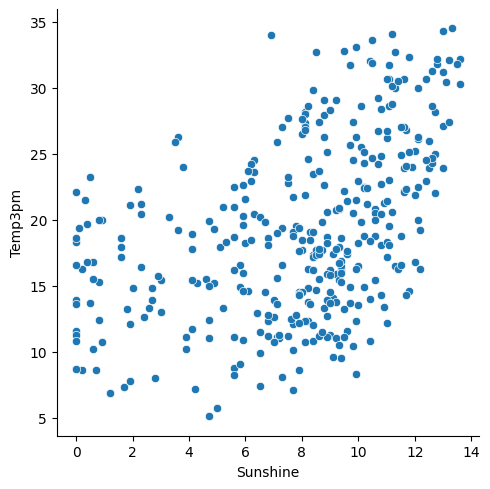

In [34]:
sns.relplot(x='Sunshine',y='Temp3pm',data=weather_data)

<ipython-input-36-5c14aeca1340>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weather_data['WindSpeed9am'])
<ipython-input-36-5c14aeca1340>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weather_data['WindSpeed3pm'])


<Axes: xlabel='WindSpeed3pm', ylabel='Density'>

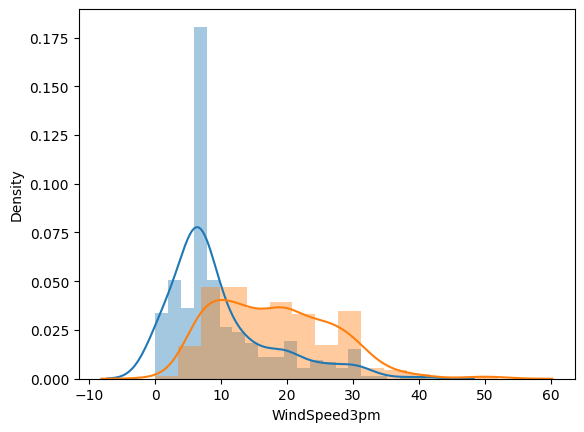

In [36]:
sns.distplot(weather_data['WindSpeed9am'])
sns.distplot(weather_data['WindSpeed3pm'])

<Axes: xlabel='count', ylabel='WindDir3pm'>

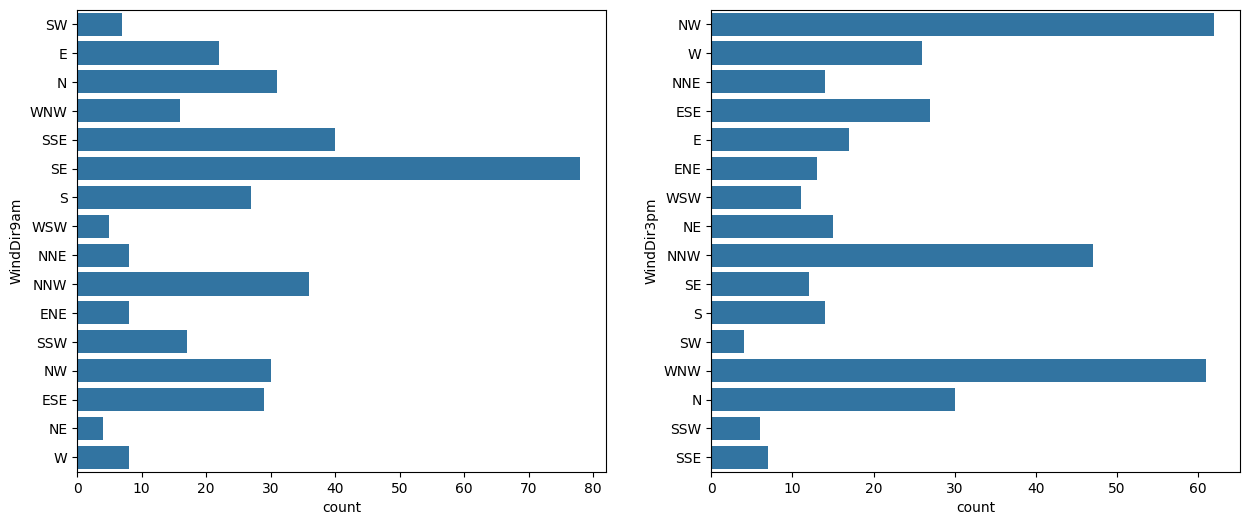

In [38]:
fig, ax =plt.subplots(1,2,figsize= (15,6))
sns.countplot(weather_data['WindDir9am'],ax=ax[0])
sns.countplot(weather_data['WindDir3pm'],ax=ax[1])

<Axes: xlabel='Humidity3pm', ylabel='Evaporation'>

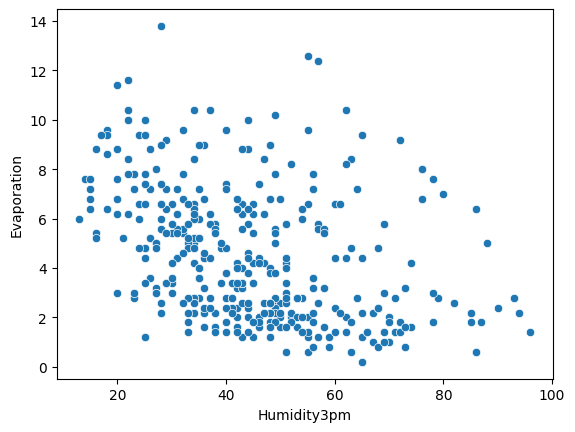

In [43]:
sns.scatterplot(data=weather_data,x='Humidity3pm', y='Evaporation')

<ipython-input-44-2d88ec7bb14f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weather_data['Pressure9am'],ax=ax[0])
<ipython-input-44-2d88ec7bb14f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weather_data['Pressure3pm'],ax=ax[1])


<Axes: xlabel='Pressure3pm', ylabel='Density'>

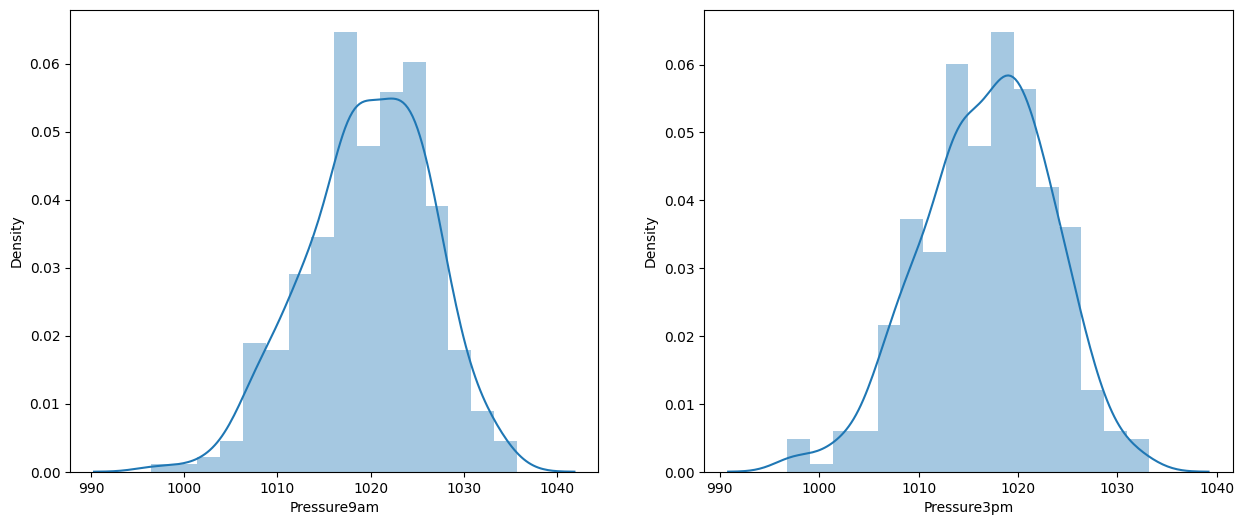

In [44]:
fig, ax =plt.subplots(1,2,figsize= (15,6))
sns.distplot(weather_data['Pressure9am'],ax=ax[0])
sns.distplot(weather_data['Pressure3pm'],ax=ax[1])

In [48]:
weather_data[['Rainfall','Sunshine','Evaporation','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am',
    'Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am',
    'Temp3pm']].groupby(weather_data['RainToday']).mean()

,Rainfall,Sunshine,Evaporation,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
RainToday,,,,,,,,,,,,,,
No,0.056667,8.179729,4.562667,38.682271,8.683036,17.640000,70.783333,41.996667,1020.812000,1017.658667,3.593333,3.906667,12.126333,19.456000
Yes,7.663636,6.680445,4.336364,45.106061,14.055330,19.560606,77.727273,55.984848,1014.695455,1012.954545,5.242424,4.560606,13.413636,18.207576


In [49]:
from sklearn.preprocessing import LabelBinarizer

In [50]:
LB = LabelBinarizer()
weather_data['WindGustDir'] = LB.fit_transform(weather_data[['WindGustDir']])
weather_data['WindDir9am'] = LB.fit_transform(weather_data[['WindDir9am']])
weather_data['WindDir3pm'] = LB.fit_transform(weather_data[['WindDir3pm']])

In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
LE = LabelEncoder()
weather_data['RainToday'] = LE.fit_transform(weather_data['RainToday'])
weather_data['RainTomorrow'] = LE.fit_transform(weather_data['RainTomorrow'])

In [54]:
weather_data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,0,30.0,0,0,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,0,3.6,1
1,14.0,26.9,3.6,4.4,9.7,0,39.0,1,0,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,1,3.6,1
2,13.7,23.4,3.6,5.8,3.3,0,85.0,0,0,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,1,39.8,1
3,13.3,15.5,39.8,7.2,9.1,0,54.0,0,0,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,1,2.8,1
4,7.6,16.1,2.8,5.6,10.6,0,50.0,0,0,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,1,0.0,0


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [66]:
X = weather_data.drop('RainTomorrow',axis=1).values
y = weather_data['RainTomorrow'].values

minmax = MinMaxScaler()
X = minmax.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [67]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,y_train)
predict_LR = LR.predict(X_test)

In [68]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [70]:
print(classification_report(y_test,predict_LR))
print(confusion_matrix(y_test,predict_LR))
print('\n')
print('Accuracy:', np.round(accuracy_score(y_test,predict_LR),3)*100,'%')

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       103
           1       0.88      0.39      0.54        18

    accuracy                           0.90       121
   macro avg       0.89      0.69      0.74       121
weighted avg       0.90      0.90      0.88       121

[[102   1]
 [ 11   7]]


Accuracy: 90.10000000000001 %


In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
previsor_dtree = dtree.predict(X_test)

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
previsor_rfc = rfc.predict(X_test)

svc = SVC()
svc.fit(X_train, y_train)
previsor_svc = svc.predict(X_test)

Accuracy_LR = np.round(accuracy_score(y_test,predict_LR)*100,3)
Accuracy_dtree = np.round(accuracy_score(y_test,previsor_dtree)*100,3)
Accuracy_rfc = np.round(accuracy_score(y_test,previsor_rfc)*100,3)
Accuracy_svc = np.round(accuracy_score(y_test,previsor_svc)*100,3)

print('Accuracy_Decision_tree: ',Accuracy_dtree,'%')
print('Accuracy_Random_Forest: ', Accuracy_rfc,'%')
print('Accuracy_LR: ', Accuracy_LR,'%')
print('Accuracy_SVC: ', Accuracy_svc,'%')

Accuracy_Decision_tree:  100.0 %
Accuracy_Random_Forest:  100.0 %
Accuracy_LR:  90.083 %
Accuracy_SVC:  90.083 %
